In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ratings.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [5]:
df.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


In [6]:
df.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


Text(0.5, 1.0, 'Rating Distribution')

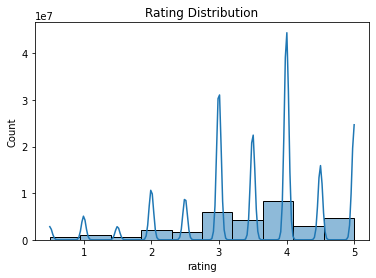

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Rating Distribution")


Text(0.5, 1.0, 'Number of Ratings per Movie')

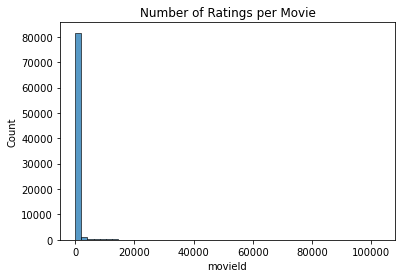

In [8]:
rating_counts = df['movieId'].value_counts()
sns.histplot(rating_counts, bins=50)
plt.title("Number of Ratings per Movie")


Text(0.5, 1.0, 'Average Rating per Movie')

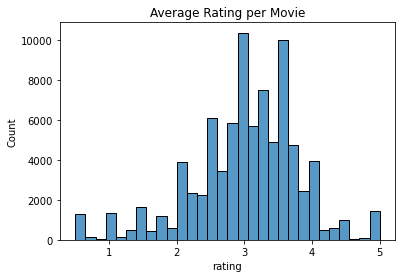

In [9]:
avg_ratings = df.groupby('movieId')['rating'].mean()
sns.histplot(avg_ratings, bins=30)
plt.title("Average Rating per Movie")


In [10]:
top_movies = df.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)
bottom_movies = df.groupby('movieId')['rating'].mean().sort_values().head(10)


In [11]:
movie_stats = df.groupby('movieId').agg({'rating': ['mean', 'count']})
popular_movies = movie_stats[movie_stats[('rating', 'count')] >= 50]


In [16]:
top_movies

movieId
199103    5.0
268476    5.0
171849    5.0
268054    5.0
268090    5.0
268114    5.0
122649    5.0
225251    5.0
147402    5.0
268438    5.0
Name: rating, dtype: float64

In [13]:
bottom_movies

movieId
277496    0.5
277854    0.5
268472    0.5
268494    0.5
268498    0.5
277830    0.5
277828    0.5
277826    0.5
277824    0.5
277822    0.5
Name: rating, dtype: float64

In [14]:
movie_stats

rating       
             mean  count
movieId                 
1        3.897438  68997
2        3.275758  28904
3        3.139447  13134
4        2.845331   2806
5        3.059602  13154
...           ...    ...
292731   4.000000      1
292737   1.500000      1
292753   4.000000      1
292755   1.000000      1
292757   3.500000      1

[84432 rows x 2 columns]

In [15]:
popular_movies

rating       
             mean  count
movieId                 
1        3.897438  68997
2        3.275758  28904
3        3.139447  13134
4        2.845331   2806
5        3.059602  13154
...           ...    ...
289253   3.590476    105
289295   2.362500     80
289297   2.975000     60
290213   3.357143     56
290407   2.877193     57

[16034 rows x 2 columns]